In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
# sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib notebook

In [9]:
df = pd.read_csv('data/train.csv', sep=',', encoding='UTF-8')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [77]:
len(df)

1460

In [10]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
df1 = df[df.columns[:29]]
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA


In [12]:
df2 = df[df.columns[29:55]]
df2.head()

,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd
0,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,...,0,1710,1,0,2,1,3,1,Gd,8
1,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,...,0,1262,0,1,2,0,3,1,TA,6
2,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,...,0,1786,1,0,2,1,3,1,Gd,6
3,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,...,0,1717,1,0,1,0,3,1,Gd,7
4,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,...,0,2198,1,0,2,1,4,1,Gd,9


In [13]:
df3 = df[df.columns[55:]]
df3.head()

,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
df2.info

<bound method DataFrame.info of      Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0         PConc       Gd       TA           No          GLQ         706   
1        CBlock       Gd       TA           Gd          ALQ         978   
2         PConc       Gd       TA           Mn          GLQ         486   
3        BrkTil       TA       Gd           No          ALQ         216   
4         PConc       Gd       TA           Av          GLQ         655   
5          Wood       Gd       TA           No          GLQ         732   
6         PConc       Ex       TA           Av          GLQ        1369   
7        CBlock       Gd       TA           Mn          ALQ         859   
8        BrkTil       TA       TA           No          Unf           0   
9        BrkTil       TA       TA           No          GLQ         851   
10       CBlock       TA       TA           No          Rec         906   
11        PConc       Ex       TA           No          GLQ         

In [16]:
df2.shape

(1460, 26)

In [17]:
df2.dtypes

Foundation      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinSF1       int64
BsmtFinType2    object
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
Heating         object
HeatingQC       object
CentralAir      object
Electrical      object
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
KitchenQual     object
TotRmsAbvGrd     int64
dtype: object

In [41]:
df2.isnull().any()

Foundation      False
BsmtQual         True
BsmtCond         True
BsmtExposure     True
BsmtFinType1     True
BsmtFinSF1      False
BsmtFinType2     True
BsmtFinSF2      False
BsmtUnfSF       False
TotalBsmtSF     False
Heating         False
HeatingQC       False
CentralAir      False
Electrical       True
1stFlrSF        False
2ndFlrSF        False
LowQualFinSF    False
GrLivArea       False
BsmtFullBath    False
BsmtHalfBath    False
FullBath        False
HalfBath        False
BedroomAbvGr    False
KitchenAbvGr    False
KitchenQual     False
TotRmsAbvGrd    False
dtype: bool

In [94]:
df2.isnull().sum()

Foundation       0
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
dtype: int64

In [76]:
df2.count()

Foundation      1460
BsmtQual        1423
BsmtCond        1423
BsmtExposure    1422
BsmtFinType1    1423
BsmtFinSF1      1460
BsmtFinType2    1422
BsmtFinSF2      1460
BsmtUnfSF       1460
TotalBsmtSF     1460
Heating         1460
HeatingQC       1460
CentralAir      1460
Electrical      1459
1stFlrSF        1460
2ndFlrSF        1460
LowQualFinSF    1460
GrLivArea       1460
BsmtFullBath    1460
BsmtHalfBath    1460
FullBath        1460
HalfBath        1460
BedroomAbvGr    1460
KitchenAbvGr    1460
KitchenQual     1460
TotRmsAbvGrd    1460
dtype: int64

In [28]:
df2[df2.columns[0]].unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

In [216]:
# for col in df2:
#     if  df2[col].dtype == 'object':
#         count = df2[col].groupby(df2[col]).count()
#         index = count.keys()
#         plt.figure(figsize=(5,5))
#         plt.bar(range(len(count)), count.values)
#         plt.title = df2[col].name
#         plt.xticks(range(len(count)), index)
#         plt.show
#         print(count, '\nNaN: ', df2[col].isnull().sum())

<IPython.core.display.Javascript object>


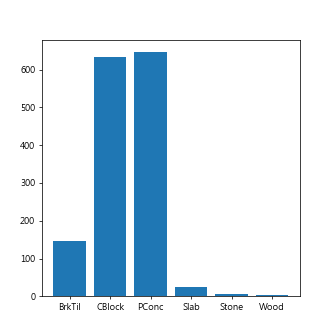

Foundation
BrkTil    146
CBlock    634
PConc     647
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64 
NaN:  0


In [151]:
col = 'Foundation'
count = df2[col].groupby(df2[col]).count()
index = count.keys()
plt.figure(figsize=(5,5))
plt.bar(range(len(count)), count.values)
plt.title = df2[col].name
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN: ', df2[col].isnull().sum())

<IPython.core.display.Javascript object>


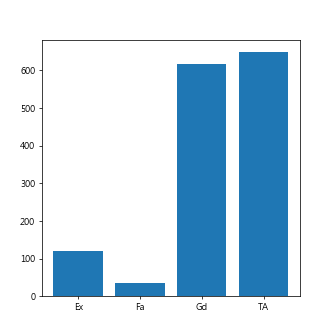

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64 
NaN:  37


In [153]:
col = 'BsmtQual'
count = df2[col].groupby(df2[col]).count()
index = count.keys()
plt.figure(figsize=(5,5))
plt.bar(range(len(count)), count.values)
plt.title = df2[col].name
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN: ', df2[col].isnull().sum())

<IPython.core.display.Javascript object>


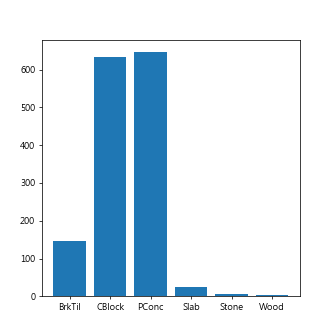

Foundation
BrkTil    146
CBlock    634
PConc     647
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64 
NaN:  0


In [151]:
col = 'BsmtCond'
count = df2[col].groupby(df2[col]).count()
index = count.keys()
plt.figure(figsize=(5,5))
plt.bar(range(len(count)), count.values)
plt.title = df2[col].name
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN: ', df2[col].isnull().sum())

<IPython.core.display.Javascript object>


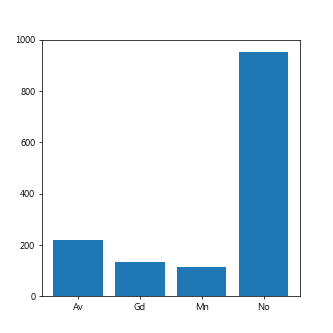

BsmtExposure
Av    221
Gd    134
Mn    114
No    953
Name: BsmtExposure, dtype: int64 
NaN:  38


In [154]:
col = 'BsmtExposure'
count = df2[col].groupby(df2[col]).count()
index = count.keys()
plt.figure(figsize=(5,5))
plt.bar(range(len(count)), count.values)
plt.title = df2[col].name
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN: ', df2[col].isnull().sum())

<IPython.core.display.Javascript object>


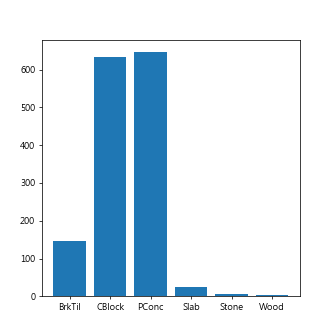

Foundation
BrkTil    146
CBlock    634
PConc     647
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64 
NaN:  0


In [151]:
col = 'BsmtFinType1'
count = df2[col].groupby(df2[col]).count()
index = count.keys()
plt.figure(figsize=(5,5))
plt.bar(range(len(count)), count.values)
plt.title = df2[col].name
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN: ', df2[col].isnull().sum())

<IPython.core.display.Javascript object>


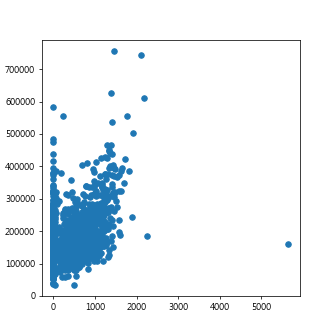

In [215]:
col = 'BsmtFinSF1'
price = df[df.columns[-1]]
plt.figure(figsize=(5,5))
plt.scatter(df2[col], price)

<IPython.core.display.Javascript object>


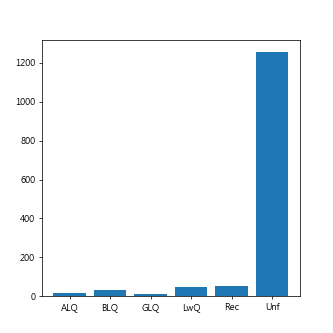

BsmtFinType2
ALQ      19
BLQ      33
GLQ      14
LwQ      46
Rec      54
Unf    1256
Name: BsmtFinType2, dtype: int64 
NaN:  38


In [156]:
col = 'BsmtFinType2'
count = df2[col].groupby(df2[col]).count()
index = count.keys()
plt.figure(figsize=(5,5))
plt.bar(range(len(count)), count.values)
plt.title = df2[col].name
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN: ', df2[col].isnull().sum())

<IPython.core.display.Javascript object>


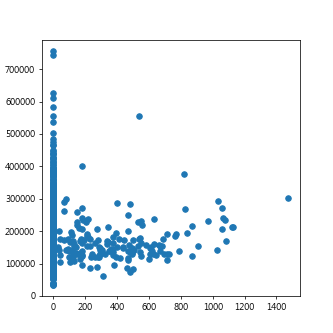

In [212]:
col = 'BsmtFinSF2'
price = df[df.columns[-1]]
plt.figure(figsize=(5,5))
plt.scatter(df2[col], price)

<IPython.core.display.Javascript object>


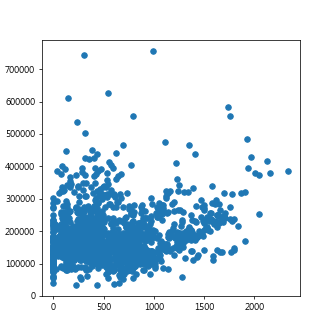

In [214]:
col = 'BsmtUnfSF'
price = df[df.columns[-1]]
plt.figure(figsize=(5,5))
plt.scatter(df2[col], price)

<IPython.core.display.Javascript object>


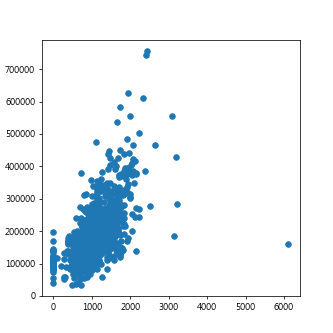

In [213]:
col = 'TotalBsmtSF'
price = df[df.columns[-1]]
plt.figure(figsize=(5,5))
plt.scatter(df2[col], price)

<IPython.core.display.Javascript object>


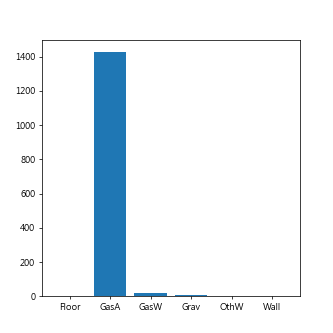

Heating
Floor       1
GasA     1428
GasW       18
Grav        7
OthW        2
Wall        4
Name: Heating, dtype: int64 
NaN:  0


In [160]:
col = 'Heating'
count = df2[col].groupby(df2[col]).count()
index = count.keys()
plt.figure(figsize=(5,5))
plt.bar(range(len(count)), count.values)
plt.title = df2[col].name
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN: ', df2[col].isnull().sum())

<IPython.core.display.Javascript object>


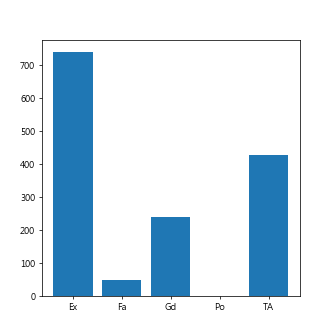

HeatingQC
Ex    741
Fa     49
Gd    241
Po      1
TA    428
Name: HeatingQC, dtype: int64 
NaN:  0


In [161]:
col = 'HeatingQC'
count = df2[col].groupby(df2[col]).count()
index = count.keys()
plt.figure(figsize=(5,5))
plt.bar(range(len(count)), count.values)
plt.title = df2[col].name
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN: ', df2[col].isnull().sum())

C:\Python\Anaconda3-52\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


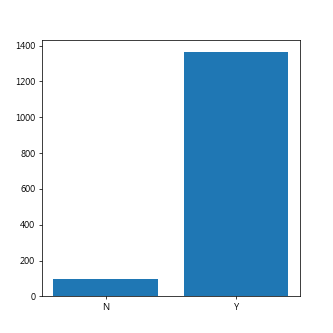

CentralAir
N      95
Y    1365
Name: CentralAir, dtype: int64 
NaN:  0


In [162]:
col = 'CentralAir'
count = df2[col].groupby(df2[col]).count()
index = count.keys()
plt.figure(figsize=(5,5))
plt.bar(range(len(count)), count.values)
plt.title = df2[col].name
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN: ', df2[col].isnull().sum())

<IPython.core.display.Javascript object>


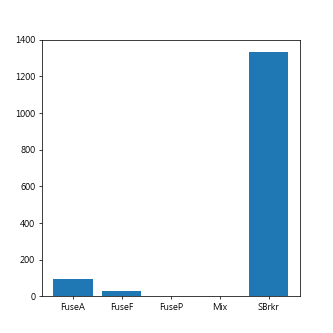

Electrical
FuseA      94
FuseF      27
FuseP       3
Mix         1
SBrkr    1334
Name: Electrical, dtype: int64 
NaN:  1


In [163]:
col = 'Electrical'
count = df2[col].groupby(df2[col]).count()
index = count.keys()
plt.figure(figsize=(5,5))
plt.bar(range(len(count)), count.values)
plt.title = df2[col].name
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN: ', df2[col].isnull().sum())

<IPython.core.display.Javascript object>


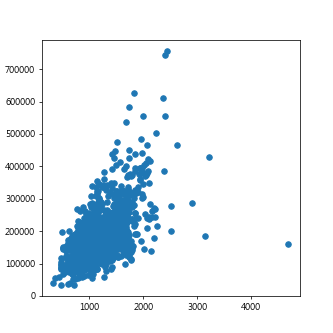

In [195]:
col = '1stFlrSF'
price = df[df.columns[-1]]
plt.figure(figsize=(5,5))
plt.scatter(df2[col], price)

<IPython.core.display.Javascript object>


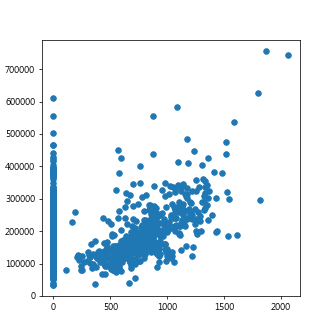

In [196]:
col = '2ndFlrSF'
price = df[df.columns[-1]]
plt.figure(figsize=(5,5))
plt.scatter(df2[col], price)

<IPython.core.display.Javascript object>


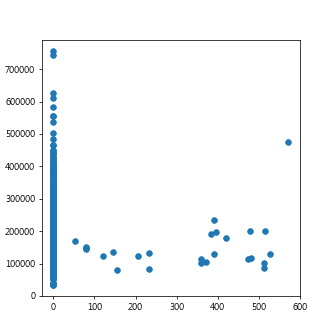

In [197]:
col = 'LowQualFinSF'
price = df[df.columns[-1]]
plt.figure(figsize=(5,5))
plt.scatter(df2[col], price)

<IPython.core.display.Javascript object>


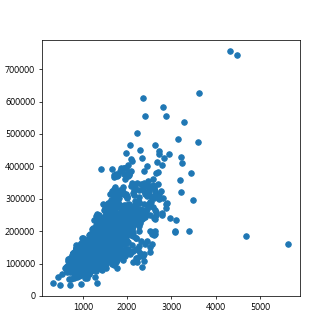

In [198]:
col = 'GrLivArea'
price = df[df.columns[-1]]
plt.figure(figsize=(5,5))
plt.scatter(df2[col], price)

<IPython.core.display.Javascript object>


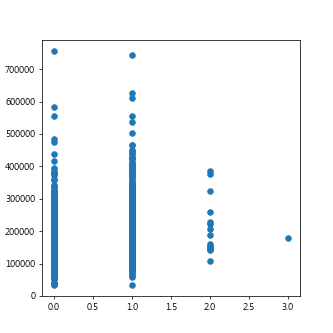

In [199]:
col = 'BsmtFullBath'
price = df[df.columns[-1]]
plt.figure(figsize=(5,5))
plt.scatter(df2[col], price)

<IPython.core.display.Javascript object>


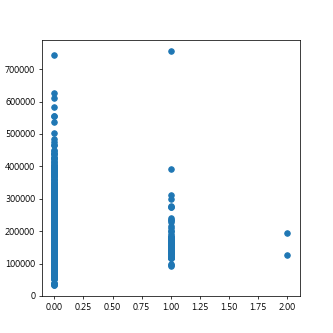

In [200]:
col = 'BsmtHalfBath'
price = df[df.columns[-1]]
plt.figure(figsize=(5,5))
plt.scatter(df2[col], price)

<IPython.core.display.Javascript object>


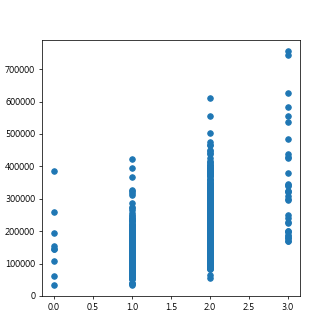

In [201]:
col = 'FullBath'
price = df[df.columns[-1]]
plt.figure(figsize=(5,5))
plt.scatter(df2[col], price)

<IPython.core.display.Javascript object>


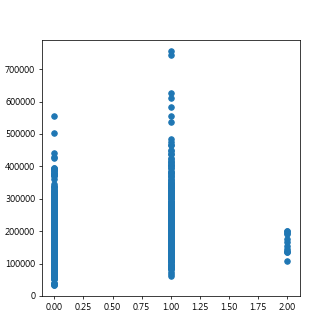

In [202]:
col = 'HalfBath'
price = df[df.columns[-1]]
plt.figure(figsize=(5,5))
plt.scatter(df2[col], price)

<IPython.core.display.Javascript object>


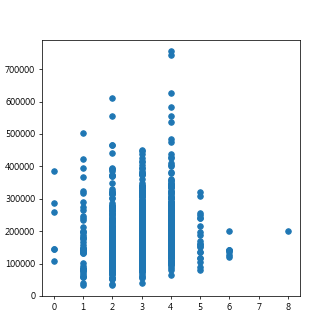

In [203]:
col = 'BedroomAbvGr'
price = df[df.columns[-1]]
plt.figure(figsize=(5,5))
plt.scatter(df2[col], price)

<IPython.core.display.Javascript object>


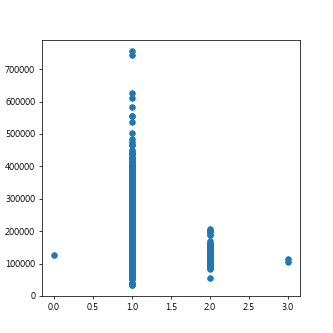

In [204]:
col = 'KitchenAbvGr'
price = df[df.columns[-1]]
plt.figure(figsize=(5,5))
plt.scatter(df2[col], price)

<IPython.core.display.Javascript object>


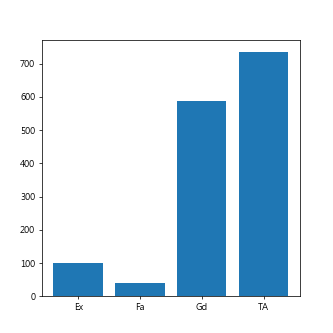

KitchenQual
Ex    100
Fa     39
Gd    586
TA    735
Name: KitchenQual, dtype: int64 
NaN:  0


In [206]:
col = 'KitchenQual'
count = df2[col].groupby(df2[col]).count()
index = count.keys()
plt.figure(figsize=(5,5))
plt.bar(range(len(count)), count.values)
plt.title = df2[col].name
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN: ', df2[col].isnull().sum())

<IPython.core.display.Javascript object>


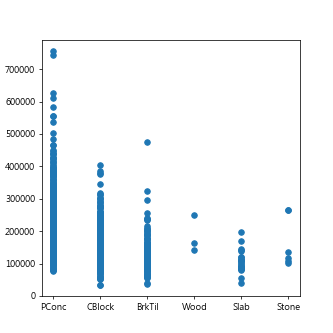

In [207]:
col = 'TotRmsAbvGrd'
price = df[df.columns[-1]]
plt.figure(figsize=(5,5))
plt.scatter(df2[col], price)
# Xticks 이름이 이상.......

In [184]:
df2.corr()[((df2.corr() > 0.5) | (df2.corr() < -0.5))]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr
BsmtFinSF1,1.000000,NaN,NaN,0.522396,NaN,NaN,NaN,NaN,0.649212,NaN,NaN,NaN,NaN,NaN
BsmtFinSF2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtUnfSF,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,0.522396,NaN,NaN,1.000000,0.819530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1stFlrSF,NaN,NaN,NaN,0.819530,1.000000,NaN,NaN,0.566024,NaN,NaN,NaN,NaN,NaN,NaN
2ndFlrSF,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.687501,NaN,NaN,NaN,0.609707,0.502901,NaN
LowQualFinSF,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,NaN,NaN,NaN,NaN,0.566024,0.687501,NaN,1.000000,NaN,NaN,0.630012,NaN,0.521270,NaN
BsmtFullBath,0.649212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
BsmtHalfBath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
